# Map Image

The `geetools` extension contains a set of functions for rendering maps from `ee.Image` objects. Use the following function descriptions and examples to determine the best function and chart type for your purpose.

In [1]:
import ee, pytest_gee, os

if "EARTHENGINE_SERVICE_ACCOUNT" in os.environ:
    pytest_gee.init_ee_from_service_account()
elif "EARTHENGINE_PROJECT" in os.environ:
    pytest_gee.init_ee_from_token()
else:
    raise ValueError("Cannot authenticate with Earth Engine.")

[![github](https://img.shields.io/badge/-see%20sources-white?logo=github&labelColor=555)](https://github.com/gee-community/geetools/blob/main/docs/usage/plot/map-image.ipynb)
[![colab](https://img.shields.io/badge/-open%20in%20colab-blue?logo=googlecolab&labelColor=555)](https://colab.research.google.com/github/gee-community/geetools/blob/main/docs/usage/plot/map-image.ipynb)

## Set up environment

Install the required packages and authenticate your Earth Engine account.

In [2]:
# uncomment if installation of libs is necessary
# !pip install earthengine-api geetools

In [3]:
from IPython.display import display
from matplotlib import pyplot as plt

import ee
import geetools #noqa: F401

In [4]:
# uncomment if authetication to GEE is needed
# ee.Authenticate()
# ee.Intialize(project="<your_project>")

## Example data 

The following examples rely on the "COPERNICUS/S2_HARMONIZED" `ee.ImageCollection` filtered between 2022-06-01 and 2022-06-30. We then build the NDVI spectral indice and use mosaic to get an `ee.Image` object. This object is clipped over the Vatican city as it's one of the smallest country in the world.

In [5]:
# load the vatican
level0 = ee.FeatureCollection("FAO/GAUL/2015/level0")
vatican = level0.filter(ee.Filter.eq("ADM0_NAME", "Holy See"))

# pre-process the imagecollection and mosaic the month of June 2022
image = (
    ee.ImageCollection('COPERNICUS/S2_HARMONIZED')
    .filterDate('2022-06-01', '2022-06-30')
    .filterBounds(vatican)
    .geetools.maskClouds()
    .geetools.spectralIndices("NDVI")
    .mosaic()
)

/home/vscode/.local/lib/python3.11/site-packages/ee_extra/QA/clouds.py:328: UserWarning: This platform is not supported for cloud masking.
  warnings.warn("This platform is not supported for cloud masking.")


## Map Raster

```{api}
{py:meth}`plot <geetools.Image.ImageAccessor.plot>`: 
    {docstring}`geetools.ImageAccessor.plot`
```

An `ee.image` is a raster representation of the Earth's surface. The `plot` function allows you to visualize the raster data on a map. The function provides options to customize the visualization, such as the color palette, opacity, and the visualization range.

### Map pseudo color

A pseudo-color image is a single-band raster image that uses a color palette to represent the data. The following example demonstrates how to plot the NDVI pseudo-color image using the `plot` function.

First create a matplotlib figure and axis: 

In [6]:
plt.ioff() # remove interactive for the sake of the example
fig, ax = plt.subplots()

Then you can add the map to the axis. Provide a single element list in the bands parameter to plot the NDVI image. 
As per interactive representation an image needs to be reduced to a region, here "Vatican City". In this example we also select a pseudo-mercator projection and we displayed the `ee.FeatureCollection` on top of it.

In [7]:
image.geetools.plot(
    bands = ["NDVI"],
    ax=ax,
    region=vatican.geometry(),
    crs="EPSG:3857",
    scale=10,
    fc=vatican,
    cmap="viridis",
    color="k"
)

/home/vscode/.local/lib/python3.11/site-packages/xee/ext.py:685: UserWarning: Unable to retrieve 'system:time_start' values from an ImageCollection due to: No 'system:time_start' values found in the 'ImageCollection'.
  warnings.warn(


Now that we have the plot, we can customize it with matplotlib. For example, we can add a title and a colorbar.

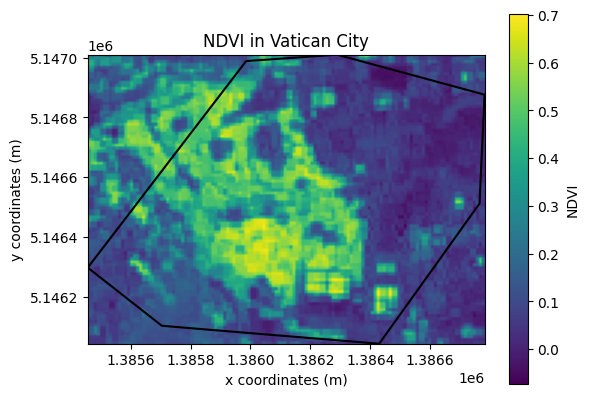

In [8]:
# as it's a figure you can then edit the information as you see fit
ax.set_title("NDVI in Vatican City")
ax.set_xlabel("x coordinates (m)")
ax.set_ylabel("y coordinates (m)")
fig.colorbar(ax.images[0], label="NDVI")

display(fig)

### Map RGB combo

An RGB image is a three-band raster image that uses the red, green, and blue bands to represent the data. The following example demonstrates how to plot the RGB image using the `plot` function.

First create a matplotlib figure and axis: 

In [9]:
plt.ioff() # remove interactive for the sake of the example
fig, ax = plt.subplots()

Then you can add the map to the axis. Provide a 3 elements list in the bands parameter to plot the NDVI image. 
As per interactive representation an image needs to be reduced to a region, here "Vatican City". In this example we displayed the `ee.FeatureCollection` on top of it.

In [10]:
image.geetools.plot(
    bands = ["B4", "B3", "B2"],
    ax=ax,
    region=vatican.geometry(),
    fc=vatican,
    color="k"
)

/home/vscode/.local/lib/python3.11/site-packages/xee/ext.py:685: UserWarning: Unable to retrieve 'system:time_start' values from an ImageCollection due to: No 'system:time_start' values found in the 'ImageCollection'.
  warnings.warn(


and finally customize the plot:

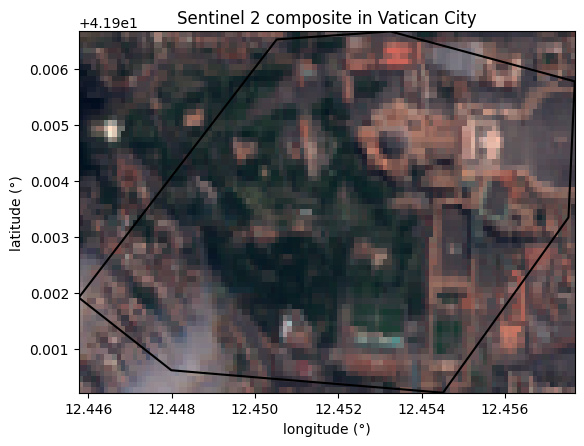

In [11]:
# as it's a figure you can then edit the information as you see fit
ax.set_title("Sentinel 2 composite in Vatican City")
ax.set_xlabel("longitude (°)")
ax.set_ylabel("latitude (°)")

display(fig)